In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from selenium import webdriver
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz

C:\Users\Qazal\AppData\Roaming\Python\Python39\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

OSError: [Errno 22] Invalid argument: 'D:\\quera\tamrin\\prozhe nahaei\train_data.csv'

<div style="direction:rtl; font-size: 25px; background-color: cyan; color:black; padding:30px 0">  پیش پردازش داده </div>

In [3]:
### Convert to int16 to save memory
df_train['overall'] = df_train['overall'].astype('int16') 
### Convert to datetime type
df_train['reviewTime'] =  pd.to_datetime(df_train['reviewTime'])
df_test['reviewTime'] =  pd.to_datetime(df_test['reviewTime'])
### Drop few rows so that data becomes cleaner (This is a minor change.)
df_train = df_train.dropna(subset=['summary', 'reviewerName', 'style'])
### Sort by datetime (reviewTime column)
df_train.sort_values(by='reviewTime', axis=0, inplace=True, ascending=True)
df_test.sort_values(by='reviewTime', axis=0, inplace=True, ascending=True)
### Max and Min date range
print(f"Max date : {df_train['reviewTime'].max()}")
print(f"Min date : {df_train['reviewTime'].min()}")

### Convert vote column
### For train
df_train['vote'] = pd.to_numeric(df_train['vote'], errors='coerce', downcast='integer')
df_train['vote'] = df_train['vote'].fillna(pd.NA).astype('Int32')
### For test
df_test['vote'] = pd.to_numeric(df_test['vote'], errors='coerce', downcast='integer')
df_test['vote'] = df_test['vote'].fillna(pd.NA).astype('Int32')

### reset index
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

Max date : 2018-10-03 00:00:00
Min date : 2016-01-01 00:00:00


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490443 entries, 0 to 490442
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   overall         490443 non-null  int16         
 1   vote            110386 non-null  Int32         
 2   verified        490443 non-null  bool          
 3   reviewTime      490443 non-null  datetime64[ns]
 4   reviewerID      490443 non-null  object        
 5   asin            490443 non-null  object        
 6   style           490443 non-null  object        
 7   reviewerName    490443 non-null  object        
 8   reviewText      490443 non-null  object        
 9   summary         490443 non-null  object        
 10  unixReviewTime  490443 non-null  int64         
dtypes: Int32(1), bool(1), datetime64[ns](1), int16(1), int64(1), object(6)
memory usage: 33.7+ MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   vote            4933 non-null   Int32         
 1   verified        19999 non-null  bool          
 2   reviewTime      19999 non-null  datetime64[ns]
 3   reviewerID      19999 non-null  object        
 4   asin            19999 non-null  object        
 5   style           11504 non-null  object        
 6   reviewerName    19995 non-null  object        
 7   reviewText      19999 non-null  object        
 8   summary         19997 non-null  object        
 9   unixReviewTime  19999 non-null  int64         
dtypes: Int32(1), bool(1), datetime64[ns](1), int64(1), object(6)
memory usage: 1.3+ MB


<div style="direction:rtl; font-size: 25px; background-color: cyan; color:black; padding:30px 0"> بخش ۱) تجزیه و تحلیل اولیه از داده‌ها </div>

<div style="direction:rtl; font-size: 25px; background-color: green; color:black;"> قسمت اول </div>

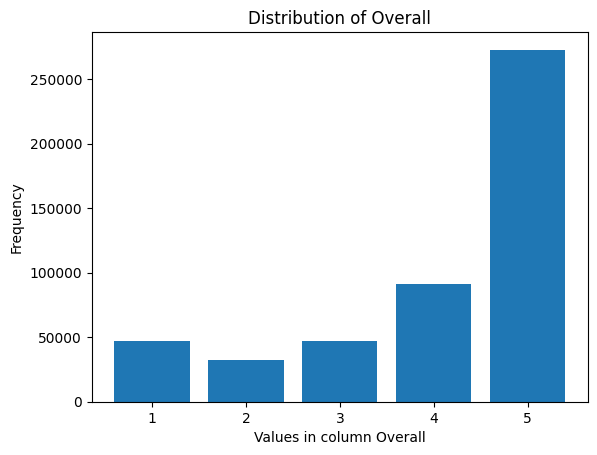

In [6]:
### Plot distrubution of overall column 
overall_values = df_train['overall'].value_counts().sort_index(ascending=False)
plt.xlabel('Values in column Overall')
plt.ylabel('Frequency')
plt.title('Distribution of Overall')
plt.bar(overall_values.index, overall_values.values)
plt.show()

<div style="direction:rtl; font-size: 25px; background-color: green; color:black;"> قسمت دوم </div>

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Qazal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


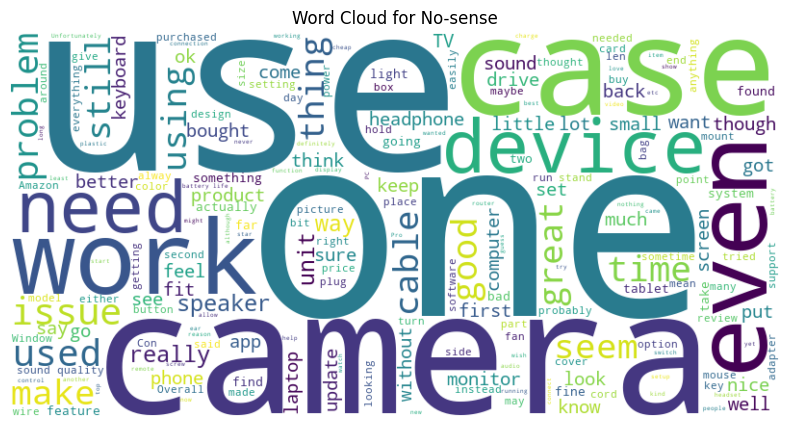

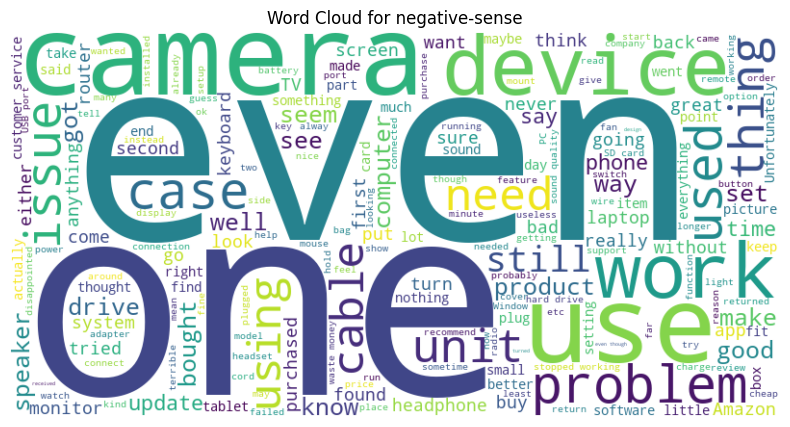

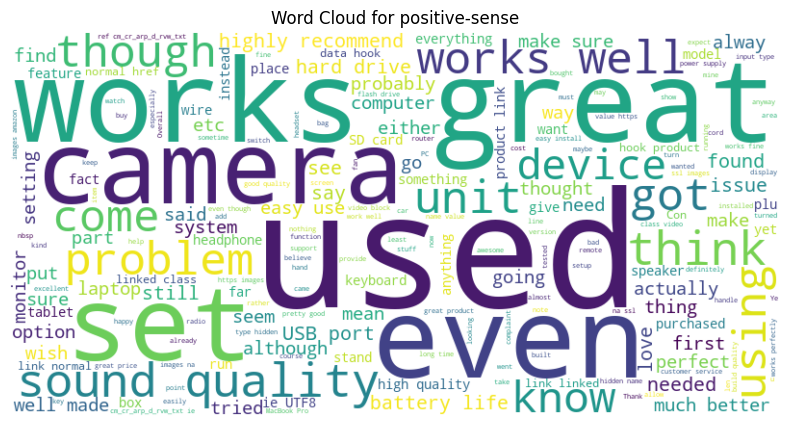

In [7]:
# ### You only need to run this once . Uncomment it again afterwards.
nltk.download('stopwords')

### Define 3 groups
group_labels = {
    4: 'positive-sense',
    5: 'positive-sense',
    3: 'No-sense',
    2: 'negative-sense',
    1: 'negative-sense'
}
### Create a copy just to be sure
df_cloud = df_train.copy()

### Filter the DataFrame based on the custom group labels
df_cloud['group'] = df_cloud['overall'].map(group_labels)

### Just to be sure of results
### Filter out rows with no valid group
df = df_cloud[df_cloud['group'].notna()]

### Define a function to remove stop words from text string
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

### Apply remove_stopwords method to reviewText column
df_cloud['reviewText'] = df_cloud['reviewText'].apply(remove_stopwords)

### Plot word CLoud for each group
for group, data in df_cloud.groupby('group'):
    text = ' '.join(data['reviewText'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {group}')
    plt.axis('off')
    plt.show()

<div style="direction:rtl; font-size: 25px; background-color: green; color:black;"> قسمت سوم </div>

In [8]:
top_10_votes = df_train.sort_values(by='vote', ascending=False)
top_10_votes[['reviewerName', 'vote']].head(10)

,reviewerName,vote
89275,David H,982
144944,VermontGuy,971
114614,Chris Upton,970
207301,Tech Dude,920
123207,R. Voorhees,919
44573,Obi Wan,909
75913,Benson Leung,889
366555,In Depth Reviewer - Xunno,831
49846,JBHorner,822
106452,N. Smith,819


<div style="direction:rtl; font-size: 25px; background-color: green; color:black;"> قسمت چهارم </div>

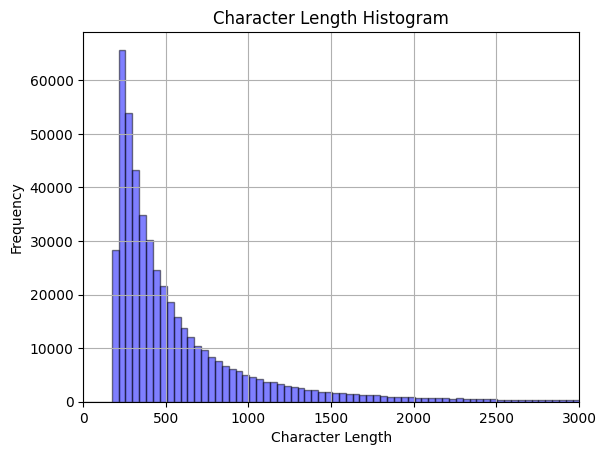

In [9]:
### Calculate bins using square root
num_bins = int(np.sqrt(len(df_train['reviewText'])))
### Plot
plt.hist(df_train['reviewText'].apply(len), bins=num_bins, alpha=0.5, color='b', edgecolor='black')
plt.title('Character Length Histogram')
plt.xlabel('Character Length')
plt.ylabel('Frequency')

### Limit x-axis
plt.xlim(0, 3000)

plt.grid(True)
plt.show()

<div style="direction:rtl; font-size: 25px; background-color: green; color:white;"> با توجه به نمودار هستوگرام بدست امده ، پیشنهاد میشود محدودیت ۲۰۰۰ تایی برای تعداد کاراکترهای نظرات در نظر گرفته شود چراکه اکثریت نظرات کمتر از این تعداد کاراکتر داشتند.  </div>

<div style="direction:rtl; font-size: 25px; background-color: green; color:black;"> قسمت پنجم </div>

In [10]:
### Groupby product string ID
top_10_products = df_train[df_train['overall'] == 5].groupby('asin').size().reset_index(name='count')
### Sort them by their count 
top_10_products = top_10_products.sort_values(by='count', ascending=False)
top_10_products = top_10_products[:10].reset_index(drop=True)
top_10_products

,asin,count
0,B000VS4HDM,598
1,B00S9SGNNS,471
2,B000WYVBR0,448
3,B00P7EVST6,433
4,B00OAJ412U,430
5,B00DIF2BO2,427
6,B00JX1ZS5O,414
7,B00BWF5U0M,411
8,B016XTADG2,400
9,B003INFE16,400


In [11]:
from time import sleep
from selenium.webdriver.common.by import By
from webdriver_manager.firefox import GeckoDriverManager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

### Path to your selenium driver
# driver_path = '/usr/local/bin/geckodriver'

# driver = webdriver.Firefox(executable_path=driver_path)
# service = Service(executable_path='D:\quera\tamrin\prozhe nahaei\chromedriver.exe')
driver = webdriver.Firefox()
brands = []
models = []



for product_id in top_10_products["asin"]:
    driver.get(f"https://www.amazon.com/dp/{product_id}")

    ### Model name
    model_name = driver.find_element(By.ID,'productTitle').text

    ### Brand name
    inner_html = "Brand" 
    xpath_expression = f"//span[contains(., '{inner_html}')]"
    span_element = driver.find_element(By.XPATH,xpath_expression)
    parent_element = span_element.find_element(By.XPATH,'..')
    sibling_element = parent_element.find_element(By.XPATH,'following-sibling::*')
    child_element = sibling_element.find_element(By.XPATH,'.//*')
    inner_html = child_element.get_attribute('innerHTML')
    brand_name = inner_html

    try:
        pass
    except NoSuchElementException:
        button = driver.find_element_by_xpath('/html/body/div[1]/header/div/div[4]/div[1]/div/div/div[3]/span[1]/span/input')
        button.click()
    
    brands.append(brand_name)
    models.append(model_name)

    sleep(3)
driver.quit()

In [12]:
top_10_products['Brand'] = brands
top_10_products['Model'] = models
top_10_products.rename(columns={'asin': 'Product_id', 'count': 'No_5_star_Reviews'}, inplace=True)
top_10_products

,Product_id,No_5_star_Reviews,Brand,Model
0,B000VS4HDM,598,StarTech.com,StarTech.com USB 2.0 to IDE SATA Adapter - 2.5...
1,B00S9SGNNS,471,ASUS,"""ASUS AC3200 Tri-Band Gigabit WiFi Router, AiP..."
2,B000WYVBR0,448,VideoSecu,VideoSecu ML531BE2 TV Wall Mount kit with Free...
3,B00P7EVST6,433,Arlo,Arlo - Wireless Home Security Camera System | ...
4,B00OAJ412U,430,SAMSUNG,SAMSUNG 850 EVO 250GB 2.5-Inch SATA III Intern...
5,B00DIF2BO2,427,Cheetah,Cheetah Mounts APFMSB TV Wall Mount Bracket fo...
6,B00JX1ZS5O,414,SABRENT,"Sabrent 4-Port USB Hub, USB 3.0 Fast Data Hub ..."
7,B00BWF5U0M,411,SABRENT,SABRENT 4 Port USB 2.0 Data Hub with Individua...
8,B016XTADG2,400,Anker,"Upgraded, Anker Soundcore Bluetooth Speaker wi..."
9,B003INFE16,400,Cooler Master,Cooler Master Vortex Plus - CPU Cooler with Al...


<div style="direction:rtl; font-size: 25px; background-color: green; color:black;"> قسمت ششم </div>

In [13]:
### First get top 10 products with most reviews 
top_10_reviews = df_train.groupby(by='asin').agg({'asin': 'count'}).rename_axis('Product_id').sort_values(by='asin', ascending=False)[:10].reset_index()
top_10_reviews.rename(columns={'asin': 'Total_Reviews'}, inplace=True)
### Then calculate average overall rating for top 10 products with most reviews
means = []
for pid in top_10_reviews['Product_id']:
    average = df_train[df_train['asin'] == pid]['overall'].mean()
    means.append(average)
### Add averages to top_10_reviews
top_10_reviews['Mean_Overall'] = means

In [14]:
### Finally get their brands from web
brands_2 = []
for p_id in top_10_reviews['Product_id']:
    ### Check to see if we already have the brand name from previous section
    if p_id in top_10_products['Product_id'].values:
        b = top_10_products[top_10_products['Product_id'] == p_id]['Brand'].values[0]
        brands_2.append(b)
    else:
        print(f"p_id {p_id} did Not exist. Scraping...\n")
        ### Scrape brand name from web
        ### Path to your selenium driver
        driver_path = '/usr/local/bin/geckodriver'
        
        driver = webdriver.Firefox()
        driver.get(f"https://www.amazon.com/dp/{p_id}")

        ### Brand name
        inner_html = "Brand" 
        xpath_expression = f"//span[contains(., '{inner_html}')]"
        span_element = driver.find_element(By.XPATH,xpath_expression)
        parent_element = span_element.find_element(By.XPATH,'..')
        sibling_element = parent_element.find_element(By.XPATH,'following-sibling::*')
        child_element = sibling_element.find_element(By.XPATH,'.//*')
        inner_html = child_element.get_attribute('innerHTML')
        brand_name = inner_html
        brands_2.append(brand_name)


        try:
            pass
        except NoSuchElementException:
            button = driver.find_element_by_xpath('/html/body/div[1]/header/div/div[4]/div[1]/div/div/div[3]/span[1]/span/input')
            button.click()
        sleep(3)
        driver.quit()
### Add brands to top_10_reviews
top_10_reviews['Brands'] = brands_2
top_10_reviews

p_id B00BUSDVBQ did Not exist. Scraping...

p_id B01BGTG41W did Not exist. Scraping...

p_id B006JH8T3S did Not exist. Scraping...

p_id B003Y5RYNY did Not exist. Scraping...



,Product_id,Total_Reviews,Mean_Overall,Brands
0,B00P7EVST6,1114,3.657092,Arlo
1,B00S9SGNNS,905,3.690608,ASUS
2,B000VS4HDM,793,4.403531,StarTech.com
3,B00BUSDVBQ,760,3.730263,TP-Link
4,B00JX1ZS5O,759,4.005270,SABRENT
5,B01BGTG41W,747,3.583668,SanDisk
6,B00DIF2BO2,736,4.177989,Cheetah
7,B006JH8T3S,682,4.102639,Logitech
8,B000WYVBR0,672,4.316964,VideoSecu
9,B003Y5RYNY,670,3.807463,TP-Link


In [15]:
top_10_reviews

,Product_id,Total_Reviews,Mean_Overall,Brands
0,B00P7EVST6,1114,3.657092,Arlo
1,B00S9SGNNS,905,3.690608,ASUS
2,B000VS4HDM,793,4.403531,StarTech.com
3,B00BUSDVBQ,760,3.730263,TP-Link
4,B00JX1ZS5O,759,4.005270,SABRENT
5,B01BGTG41W,747,3.583668,SanDisk
6,B00DIF2BO2,736,4.177989,Cheetah
7,B006JH8T3S,682,4.102639,Logitech
8,B000WYVBR0,672,4.316964,VideoSecu
9,B003Y5RYNY,670,3.807463,TP-Link


<div style="direction:rtl; font-size: 25px; background-color: cyan; color:black; padding:30px 0"> بخش ۲) میزان رضایت از یک جنبه‌ی مشخص
 </div>

In [ ]:
# nltk.download('popular')
keywords = ["guarantee", "warranty"]
similar_indices = []

for index, text in enumerate(df_train['reviewText']):
    tokens = word_tokenize(text)
    found_similar_word = False  
    for word in tokens:
        for keyword in keywords:
            similarity = fuzz.ratio(word.lower(), keyword)
            if similarity > 80:
                found_similar_word = True
                break  
        if found_similar_word:
            break 
    if found_similar_word:
        similar_indices.append(index)

subset_df = df_train.loc[similar_indices]
subset_df

In [ ]:
import spacy

nlp = spacy.load("en_core_web_md")

target_words = ["warranty", "guarantee"]

word_embeddings = {word: nlp(word).vector for word in target_words}

similar_words = set()

for word, embedding in word_embeddings.items():
    similar_words.update({w for w in nlp.vocab if w.has_vector and w.is_lower and w.similarity(nlp(word)) > 0.8})

relevant_reviews = []

for index, row in df_train.iterrows():
    doc = nlp(row["reviewText"])
    if any(token.text.lower() in similar_words for token in doc):
        relevant_reviews.append((row["asin"], row["overall"]))

average_scores = {}

for asin, score in relevant_reviews:
    if asin not in average_scores:
        average_scores[asin] = []
    average_scores[asin].append(score)

for asin, scores in average_scores.items():
    average_scores[asin] = sum(scores) / len(scores)

for asin, average_score in average_scores.items():
    print(f"ASIN: {asin}, Average Score: {average_score}")


KeyboardInterrupt: 

In [26]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Assuming you have df_train with 'reviewText' and 'overall' columns
# Preprocess data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['reviewText'])
total_words = len(tokenizer.word_index) + 1

input_sequences = tokenizer.texts_to_sequences(df_train['reviewText'])
max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='post')

# Define the model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
model.fit(input_sequences, df_train['overall'], epochs=5)

# Assuming you have df_test with 'reviewText'
input_sequences_test = tokenizer.texts_to_sequences(df_test['reviewText'])
input_sequences_test = pad_sequences(input_sequences_test, maxlen=max_sequence_length, padding='post')

# Predict sentiment
predicted_sentiment = model.predict(input_sequences_test)

# Print predicted sentiment for each review
for i, sentiment in enumerate(predicted_sentiment):
    print(f"Review {i+1} - Predicted Sentiment: {sentiment[0]}")


ImportError: cannot import name 'layers' from partially initialized module 'keras.src' (most likely due to a circular import) (C:\Users\Qazal\AppData\Roaming\Python\Python39\site-packages\keras\src\__init__.py)